In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/big_data.csv')
pd.DataFrame.from_records(data)
data.head(1)

,arr_delay,distance,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,total_dep_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,-7,270,0,0,0,0,0,0,0,13,36.6,33.4,1022.4,984.4,5.9,3.3,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size = 0.2, random_state = 2)

In [0]:
Y_train2=data_train.loc[:,'arr_delay']
#Y_train2

X_train2 = data_train.loc[:, ~data_train.columns.isin(['total_dep_delay', 'arr_delay'])]

X_test2=data_val.loc[:, ~data_train.columns.isin(['total_dep_delay', 'arr_delay'])]

Y_test2=data_val.loc[:,'arr_delay']

## Lasso Regression for arrival delay

### Training Set

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train2, Y_train2, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [8]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train2, Y_train2)
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42536.55386698246, tolerance: 16608.19178703225
  tol, rng, random, positive)


41.46038633620812

In [0]:
coef = pd.Series(model_lasso.coef_, index = X_train2.columns)

Text(0.5, 1.0, 'Coefficients in the Lasso Model (arrival delay)')

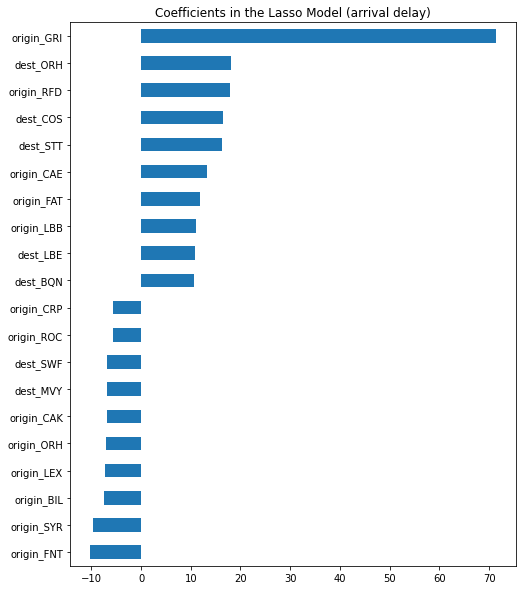

In [10]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model (arrival delay)")

In [15]:
imp_coef.sort_values(ascending=False)

origin_GRI    71.411926
dest_ORH      18.075009
origin_RFD    17.909048
dest_COS      16.442329
dest_STT      16.223112
origin_CAE    13.337185
origin_FAT    11.768331
origin_LBB    11.080169
dest_LBE      10.882741
dest_BQN      10.692749
origin_CRP    -5.568855
origin_ROC    -5.575683
dest_SWF      -6.940456
dest_MVY      -6.941045
origin_CAK    -6.942064
origin_ORH    -7.052231
origin_LEX    -7.149352
origin_BIL    -7.375498
origin_SYR    -9.740882
origin_FNT   -10.218073
dtype: float64

### Test Set

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error 
import math  
#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_test, Y_test)
#rmse_cv(model_lasso).mean()
predict = model_lasso.predict(X_test2)
MSE = np.square(np.subtract(Y_test2,predict)).mean() 
math.sqrt(MSE)

37.910508234502984

In [12]:
coef = pd.Series(model_lasso.coef_, index = X_test2.columns)
coef

distance           -0.002693
presidents_day      2.584513
easter             -0.705731
memorial_day        1.544670
independence_day   -4.310901
                      ...   
dest_TYS            1.886705
dest_USA           -0.000000
dest_UST           -3.608586
dest_VPS           -2.051664
dest_XNA            0.000000
Length: 380, dtype: float64